# Проект 2. Разведывательный анализ данных (EDA)

Нас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Задача данного проекта - определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Задачи:
    * Проведите первичную обработку данных
    * Посмотреть на распределение признака для числовых переменных, устраните выбросы.
    * Оценить количество уникальных значений для номинативных переменных.
    * Провести корреляционный анализ количественных переменных
    * Проанализировать номинативные переменные
    * Сформулировать промежуточные и итоговые выводы по датасету

**Описание датасета** (переменные, которые содержит датасет):

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Подключение модулей и чтение файла

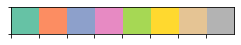

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import percentileofscore
from scipy import stats

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

plt.style.use('seaborn-pastel')  # выберем стиль графиков
sns.palplot(sns.color_palette("Set2"), 0.5)
sns.set_style("whitegrid")
sns.axes_style("whitegrid")

stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(6))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

``` Вывод: ```
загрузились 30 столбцов, а в описании датасета 29 - вопрос "почему". Всего 395 записей

In [3]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Первичная обработка данных

In [4]:
# В описании к файлу нет колонки 'studytime, granular', поэтому сразу ее удаляем

stud_math.drop(['studytime, granular'], axis='columns', inplace=True)

In [5]:
# посмотрим как записаны столбцы
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [6]:
# переименуем названия колонок
# все названия с маленькой буквы
stud_math.columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'parents_status', 'mum_edu',
    'father_edu', 'mum_job', 'father_job', 'reason', 'guardian', 'traveltime',
    'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
    'health', 'absences', 'score'
]

In [7]:
# проверим результат
display(stud_math.head(3))

,school,sex,age,address,famsize,parents_status,mum_edu,father_edu,mum_job,father_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


In [8]:
# Посмотрим информации о типе данных и их количестве
print(stud_math.shape)
print(stud_math.dtypes)

(395, 29)
school             object
sex                object
age                 int64
address            object
famsize            object
parents_status     object
mum_edu           float64
father_edu        float64
mum_job            object
father_job         object
reason             object
guardian           object
traveltime        float64
studytime         float64
failures          float64
schoolsup          object
famsup             object
paid               object
activities         object
nursery            object
higher             object
internet           object
romantic           object
famrel            float64
freetime          float64
goout             float64
health            float64
absences          float64
score             float64
dtype: object


In [9]:
# отберем колонки с категориальными значениями
df_nonnumeric = stud_math.select_dtypes(exclude=[np.number])
nonnumeric_cols = df_nonnumeric.columns.values
print(nonnumeric_cols)

['school' 'sex' 'address' 'famsize' 'parents_status' 'mum_job'
 'father_job' 'reason' 'guardian' 'schoolsup' 'famsup' 'paid' 'activities'
 'nursery' 'higher' 'internet' 'romantic']


In [10]:
# отберем колонки с числовыми значениями
df_numeric = stud_math.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'mum_edu' 'father_edu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'health' 'absences' 'score']


Всего 395 наблюдений с 29 переменными. В каждой строке один студент, а в каждом столбце содержится характеристика о нем. Столбец оценки ('score') является нашей целевой переменной.

## Поработаем с отсутствующими значениями

### Посмотрим визуально на тепловую карту пропущенных данных

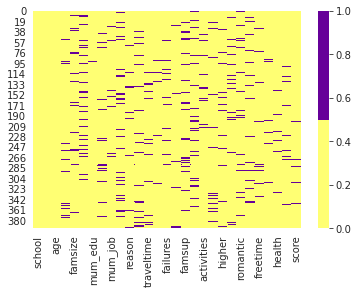

In [11]:
cols = stud_math.columns[:]  # все колонки
# назначим цвета: желтый - не пропущенные данные, фиолетовый - пропущенные
colours = ['#FFFF73', '#660099']
sns.heatmap(stud_math[cols].isnull(), cmap=sns.color_palette(colours))

По горизонтали - признаки, по вертикали – количество записей. Фиолетовый цвет - пропуски данных.

По тепловой карте четко видно, что почти все столбцы содержат пропуски.  
Посмотрим по всем колонкам точное количество отсутствующих значений

In [23]:
for col in stud_math.columns:
    data_missing_sum = stud_math[col].isnull().sum()
    print('{} - {}'.format(data_missing_sum, col))

0 - school
0 - sex
0 - age
17 - address
27 - famsize
45 - parents_status
3 - mum_edu
24 - father_edu
19 - mum_job
36 - father_job
17 - reason
31 - guardian
28 - traveltime
7 - studytime
22 - failures
9 - schoolsup
39 - famsup
40 - paid
14 - activities
16 - nursery
20 - higher
34 - internet
31 - romantic
27 - famrel
11 - freetime
8 - goout
15 - health
12 - absences
6 - score


In [24]:
# Посмотрим количество пропусков в процентах
for col in stud_math.columns:
    data_missing = np.mean(stud_math[col].isnull())
    print('{}% - {}'.format(round(data_missing * 100), col))

0.0% - school
0.0% - sex
0.0% - age
4.0% - address
7.0% - famsize
11.0% - parents_status
1.0% - mum_edu
6.0% - father_edu
5.0% - mum_job
9.0% - father_job
4.0% - reason
8.0% - guardian
7.0% - traveltime
2.0% - studytime
6.0% - failures
2.0% - schoolsup
10.0% - famsup
10.0% - paid
4.0% - activities
4.0% - nursery
5.0% - higher
9.0% - internet
8.0% - romantic
7.0% - famrel
3.0% - freetime
2.0% - goout
4.0% - health
3.0% - absences
2.0% - score


Как мы видим, нулевых значений нет только у 3 колонок: school, sex, age. При этом по остальным колонками процент пропщенныз значений низкий. Поэтому полностью отбрасывать признаки не будем. С этими колонками нужно поработать

### Пропуски в колонке Score

Значение полученного балла по госэкзамену по математике для нас основное, нулевые значения только 2%. Удалим строки, в которых отсутсвует запись о среднем бале:

In [214]:
stud_math.dropna(subset=['score'], inplace=True)

In [215]:
# Посмотрим на эту колонку
stud_math.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Пропущенных значений больше нет

### Дополним другие недостающие значения

#### Числовые значения

Вернемся к колонкам с числовыми значениями. У нас всего 12 таких колонок: 'age', 'mum_edu', 'father_edu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'. Мы поработали с недостающими значениями в колонке 'score'. В колонке 'age' также нет пропусков. Остальные пропуски заполним наиболее часто встречающимися значениями.

In [216]:
# присвоение значений
# и создание индикаторных переменных отсутствующих значений 
df_numeric = stud_math.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = stud_math[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # только для столбцов, в которых нет значений
        stud_mode = stud_math[col].mode()  # вычисление моды
        stud_math[col] = stud_math[col].fillna(stud_mode)  # заполнение ячейки модой

#### Категориальные значения

Посмотрим на колонки с категориальныеми значениями: 'school', 'sex', 'address', 'famsize', 'parents_status', 'mum_job', 'father_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'. Из 17 столбцов 15 содержат пропуски. Заполним эти пропуски наиболее часто встречаюищимися. 

In [217]:
# присвоиение значений
# и создание индикаторных переменных отсутствующих значений 
df_nonnumeric = stud_math.select_dtypes(exclude=[np.number])
nonnumeric_cols = df_nonnumeric.columns.values

for col in nonnumeric_cols:
    missing = stud_math[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # только для столбцов, в которых отсутствуют значения
        stud_top = stud_math[col].describe()['top']
        stud_math[col] = stud_math[col].fillna(stud_top)

# Пройдемся по столбцам с числовыми значениями

## Посмотрим на возраст: 'age'

In [218]:
pd.DataFrame(stud_math.age.value_counts())

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


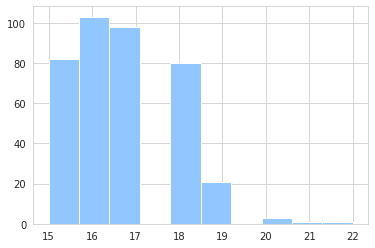

In [219]:
stud_math['age'].hist()

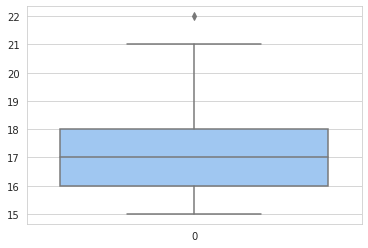

In [220]:
# Посмотрим на box plot, нет ли выбросов
sns.boxplot(data=stud_math.age)

Создается впечатление, что возраст 22 года - это выброс. Но в самом задании указано, что мы проводим исследование именно в интервале от 15 до 22 лет. Делаем вывод, что выбросов по столбцу 'age' нет.

## Образование матери: 'mum_edu'

Мое предположение: образование родителей может играть не последнюю роль в успеваемости детей. Позже посмотрим на возможную корреляцию, а пока подробно изучим эти два показателя.

Посмотрим на процентное соотношение образования матерей:

0 - образования нет

1 - 4 класса

2 - 5-9 классы

3 - среднее специальное или 11 классов

4 - высшее

Text(0.5, 0.98, 'Образование матери')

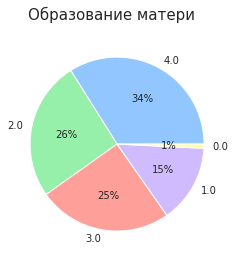

In [221]:
stud_math.mum_edu.value_counts().plot(kind='pie',
                                      label='mum_edu',
                                      autopct='%1.0f%%')
plt.ylabel(None)
plt.suptitle('Образование матери', fontsize=15)

Посмотрим, есть ли выбросы:

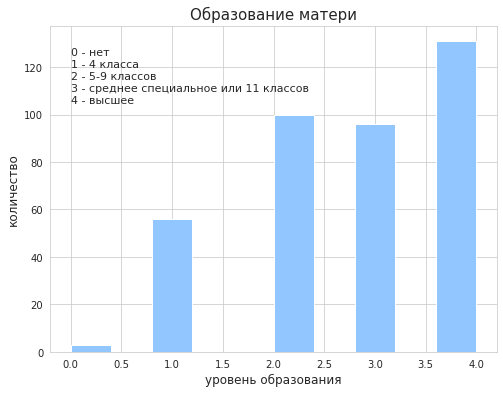

In [222]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['mum_edu'])

ax.set_title('Образование матери', fontsize=15)
ax.set_xlabel('уровень образования', fontsize=12)
ax.set_ylabel('количество', fontsize=12)

ax.text(0, 125, '0 - нет', fontsize=11)
ax.text(0, 120, '1 - 4 класса', fontsize=11)
ax.text(0, 115, '2 - 5-9 классов', fontsize=11)
ax.text(0, 110, '3 - среднее специальное или 11 классов', fontsize=11)
ax.text(0, 105, '4 - высшее', fontsize=11)

plt.show()

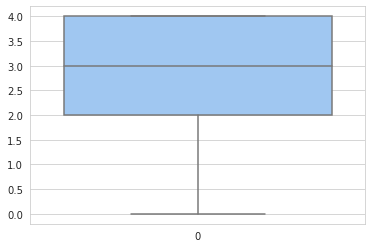

In [223]:
# Посмотрим также на box plot
sns.boxplot(data=stud_math.mum_edu)

Судя по гистограмме и ящику с усами, в категории 'mum_edu' выбросов нет

## Образование отца: 'father_edu'

Посмотрим на процентное соотношение образования матерей:

0 - образования нет  
1 - 4 класса  
2 - 5-9 классы  
3 - среднее специальное или 11 классов  
4 - высшее

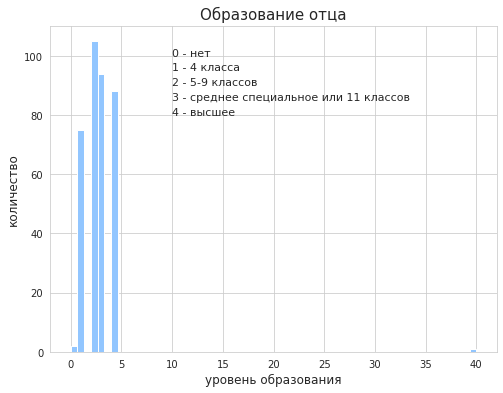

In [224]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['father_edu'], bins=60)

ax.set_title('Образование отца', fontsize=15)
ax.set_xlabel('уровень образования', fontsize=12)
ax.set_ylabel('количество', fontsize=12)

ax.text(10, 100, '0 - нет', fontsize=11)
ax.text(10, 95, '1 - 4 класса', fontsize=11)
ax.text(10, 90, '2 - 5-9 классов', fontsize=11)
ax.text(10, 85, '3 - среднее специальное или 11 классов', fontsize=11)
ax.text(10, 80, '4 - высшее', fontsize=11)

plt.show()

Не с первого раза, но заметен странный показатель уровня образования - 40

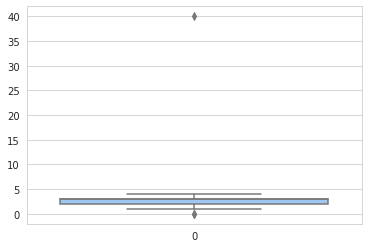

In [225]:
# Посмотрим также на box plot
sns.boxplot(data=stud_math.father_edu)

Да, дйствительно, мы видим очень странный выброс. В описании у нас 5 вариантов от 0 до 4. Посмотрим на описание столбца по цифрам, возможно, это обычная опечатка - человеческий фактор при составлении  

In [226]:
pd.DataFrame(stud_math.father_edu.value_counts())

,father_edu
2.0,105
3.0,94
4.0,88
1.0,75
0.0,2
40.0,1


Значение 40.0 встречается только 1 раз. Скорее всего при внесении данных была допущена опечатка и это 4.0. Заменим этот показатель выброса

In [227]:
stud_math.loc[stud_math['father_edu'] == 40.0, 'father_edu'] = 4.0

In [228]:
# Проверим
pd.DataFrame(stud_math.father_edu.value_counts())

,father_edu
2.0,105
3.0,94
4.0,89
1.0,75
0.0,2


Посмотрим процентное соотношение по этому показателю:

Text(0.5, 0.98, 'Образование отца')

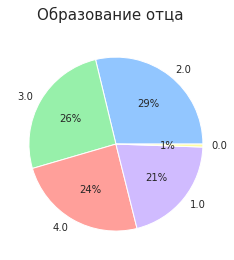

In [229]:
stud_math.father_edu.value_counts().plot(kind='pie',
                                      label='father_edu',
                                      autopct='%1.0f%%')
plt.ylabel(None)
plt.suptitle('Образование отца', fontsize=15)

## Время в пути до школы

Продолжим изучать числовые столбцы. Следующий - время в пути до школы 'traveltime'. Посмтрим на гистограмму

Text(0.5, 1.0, 'Время в пути до школы')

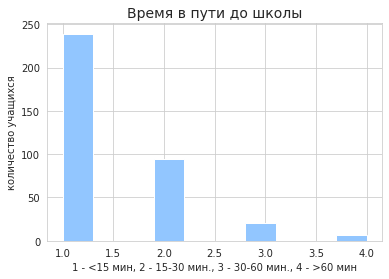

In [230]:
stud_math['traveltime'].plot(kind='hist', grid=True)
plt.xlabel('1 - <15 мин, 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин',
           fontsize=10)
plt.ylabel('количество учащихся', fontsize=10)
plt.title('Время в пути до школы', fontsize=14)

In [231]:
pd.DataFrame(stud_math.traveltime.value_counts())

,traveltime
1.0,239
2.0,94
3.0,21
4.0,7


In [232]:
# Посмтрим эти значения в процентах
print(round(stud_math['traveltime'].value_counts(normalize=True) * 100, 2))

1.0    66.20
2.0    26.04
3.0     5.82
4.0     1.94
Name: traveltime, dtype: float64


Итого: выбросов не обнаружено; более 66% учащихся добирается до школы менее, чем за 15 минут, при этом есть более 7.5% учеников, у кого на дорогу до школы уходит от 30 до 60 минут и более. 

## Время на учёбу помимо школы (в неделю)

Время на учёбу помимо школы в неделю распередляется следующим образом:  

1 - <2 часов  
2 - 2-5 часов  
3 - 5-10 часов  
4 - >10 часов  

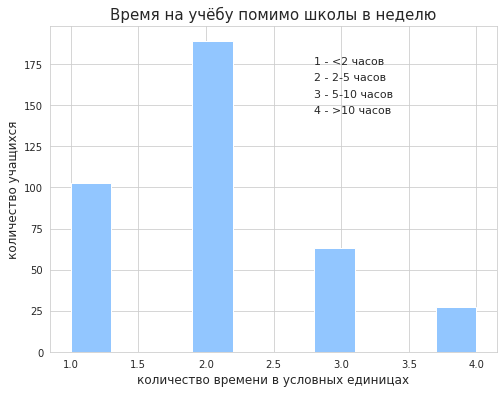

In [233]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['studytime'])

ax.set_title('Время на учёбу помимо школы в неделю', fontsize=15)
ax.set_xlabel('количество времени в условных единицах', fontsize=12)
ax.set_ylabel('количество учащихся', fontsize=12)

ax.text(2.8, 175, '1 - <2 часов', fontsize=11)
ax.text(2.8, 165, '2 - 2-5 часов', fontsize=11)
ax.text(2.8, 155, '3 - 5-10 часов', fontsize=11)
ax.text(2.8, 145, '4 - >10 часов', fontsize=11)

plt.show()

Выбросов нет. Корреляцию посмотрим в дальнейшем.

## Количество внеучебных неудач 

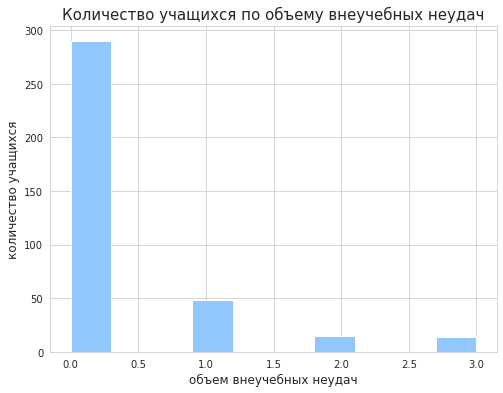

In [234]:
# Количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['failures'])

ax.set_title('Количество учащихся по объему внеучебных неудач', fontsize=15)
ax.set_xlabel('объем внеучебных неудач', fontsize=12)
ax.set_ylabel('количество учащихся', fontsize=12)

plt.show()

In [235]:
# Посмтрим эти значения в процентах
print(round(stud_math['failures'].value_counts(normalize=True) * 100, 2))

0.0    79.02
1.0    13.08
2.0     4.09
3.0     3.81
Name: failures, dtype: float64


Почти в 80% случаях говорится об отсутствии неудач. Но я бы уже сейчас посмотрела возможную зависимость со значением 'score'. 

In [236]:
# Сгруппируем два значения: 'failure' и 'score'
# Выберем первую строку 'school' для упрощения
pd.DataFrame(stud_math.groupby(['score','failures']).school.count()).T

score    0.0               20.0  25.0              30.0  35.0               \
failures   0.0 1.0 2.0 3.0   2.0   0.0 1.0 2.0 3.0   0.0   0.0 1.0 2.0 3.0   
school      17  10   4   4     1     3   2   1   1    15     3   2   1   3   

score    40.0              45.0              50.0              55.0       \
failures   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0   
school      15  10   2   1    20   2   3   1    41   6   1   4    41   3   

score    60.0      65.0          70.0      75.0      80.0  85.0  90.0       \
failures   0.0 1.0   0.0 1.0 2.0   0.0 1.0   0.0 2.0   0.0   0.0   0.0 1.0   
school      24   6    21   5   1    25   1    30   1    14     6     9   1   

score    95.0  100.0  
failures   0.0   0.0  
school       5     1

Получился любопытный результат наблюдения:   
при значениях score равным 0 количество неудач (18) выше, чем их отсутствие (17)    
при значениях score до 35 включительно кол-во неудач (1,2,3) больше, чем их отсутствие  
при значениях score больше 35 кол-во неудач (1,2,3) меньше, чем их отсутствие    
при значениях score больше 55 значения failure = 2.0 и 3.0 не встречаются  
при значениях score 70 и выше в большинстве строк практически нет неудач

Если обощить: чем меньше неудач тем выше балл 'score'
 


Text(0.5, 1.0, 'Зависимость балла по математике от количества внеучебных неудач')

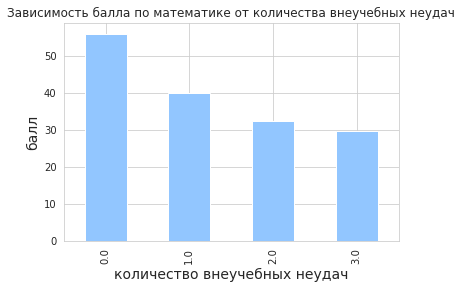

In [237]:
# Посмотрим визуально на гистограмме
stud_math.groupby('failures')['score'].mean().plot(kind='bar')
plt.xlabel('количество внеучебных неудач', fontsize=14)
plt.ylabel('балл', fontsize=14)
plt.title('Зависимость балла по математике от количества внеучебных неудач')

_Преобразуем эти данные в категориальный формат_

In [238]:
def fail(f):
    if f == 0:
        return 'отсутствуют'
    elif f == 1 or f == 2 or f == 3:
        return 'неудачи есть'
    else:
        return 'нет данных'


# добавим колонку с обозначением наличия/отсутствия неудач
stud_math['fail'] = stud_math.failures.apply(fail)

_И теперь посмотрим процентное соотношение_

In [239]:
print(round(stud_math['fail'].value_counts(normalize=True) * 100, 2))

отсутствуют     74.55
неудачи есть    19.79
нет данных       5.66
Name: fail, dtype: float64


Text(0.5, 0.98, 'Наличие внеучебных неудач')

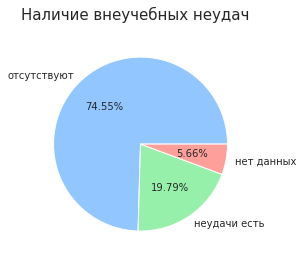

In [240]:
# И наглядно на диаграмме
stud_math.fail.value_counts().plot(kind='pie',
                                   autopct='%1.2f%%')
plt.ylabel(None)
plt.suptitle('Наличие внеучебных неудач', fontsize=15)

## Семейные отношения: 'famrel'

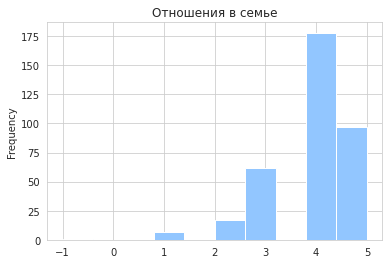

In [241]:
stud_math['famrel'].plot(kind='hist', grid=True, title='Отношения в семье')

Наши данные должны находится в пределе от1 до 5. Гистограмма показывает наличие выброса. Посмотрим box plot

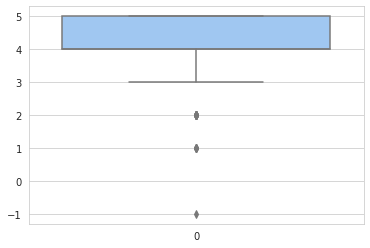

In [242]:
sns.boxplot(data=stud_math.famrel)

Да, мы видим редкие значения 1 и 2, но они входят в нашу область анализа данных. А вот значение -1 - выброс. Исключим ложное значение

In [243]:
stud_math = stud_math.loc[stud_math.famrel >= 0]

In [244]:
# Проверим, нет ли больше выбросов
# Посмотрим заодно эти значения в процентах
print(round(stud_math['famrel'].value_counts(normalize=True) * 100, 2))

4.0    49.31
5.0    26.87
3.0    17.17
2.0     4.71
1.0     1.94
Name: famrel, dtype: float64


В основном семейные отношения хорошие или очень хорошие, при этом есть небольшой процент семей с неблагоприятными отношениями внутри семьи.

## Сободное время после школы: 'freetime'

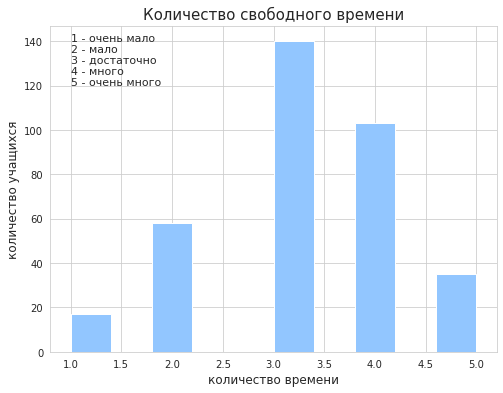

In [245]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['freetime'])

ax.set_title('Количество свободного времени', fontsize=15)
ax.set_xlabel('количество времени', fontsize=12)
ax.set_ylabel('количество учащихся', fontsize=12)

ax.text(1, 140, '1 - очень мало', fontsize=11)
ax.text(1, 135, '2 - мало', fontsize=11)
ax.text(1, 130, '3 - достаточно', fontsize=11)
ax.text(1, 125, '4 - много', fontsize=11)
ax.text(1, 120, '5 - очень много', fontsize=11)

plt.show()

In [246]:
# Посмотрим эти значения в процентах
print(round(stud_math['freetime'].value_counts(normalize=True) * 100, 2).sort_values())

1.0     4.82
5.0     9.92
2.0    16.43
4.0    29.18
3.0    39.66
Name: freetime, dtype: float64


Выбросов не обнаружено. Примерно 70% учащихся имеют достаточно и много свободного времени. У ~20% - свободного времени мало и очень мало. Также практически 10% учащихся имеет очень многосвободного времени.

## Время с друзьями: 'goout'

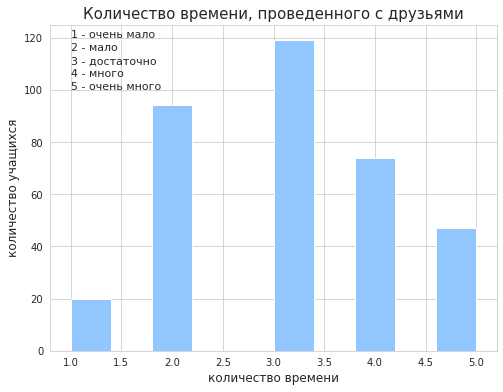

In [247]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['goout'])

ax.set_title('Количество времени, проведенного с друзьями', fontsize=15)
ax.set_xlabel('количество времени', fontsize=12)
ax.set_ylabel('количество учащихся', fontsize=12)

ax.text(1, 120, '1 - очень мало', fontsize=11)
ax.text(1, 115, '2 - мало', fontsize=11)
ax.text(1, 110, '3 - достаточно', fontsize=11)
ax.text(1, 105, '4 - много', fontsize=11)
ax.text(1, 100, '5 - очень много', fontsize=11)

plt.show()

In [248]:
# Посмотрим эти значения в процентах
print(round(stud_math['goout'].value_counts(normalize=True) * 100, 2).sort_values())

1.0     5.65
5.0    13.28
4.0    20.90
2.0    26.55
3.0    33.62
Name: goout, dtype: float64


Выбросов не найдено. Только чуть более 5.5% детей проводят очень мало времени с друзьями. У подавляющего большинства остется время на социальное общение и дружбу. 

## Здоровье: 'health'

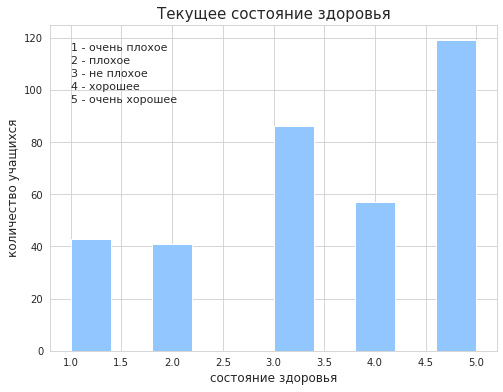

In [249]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['health'])

ax.set_title('Текущее состояние здоровья', fontsize=15)
ax.set_xlabel('состояние здоровья', fontsize=12)
ax.set_ylabel('количество учащихся', fontsize=12)

ax.text(1, 115, '1 - очень плохое', fontsize=11)
ax.text(1, 110, '2 - плохое', fontsize=11)
ax.text(1, 105, '3 - не плохое', fontsize=11)
ax.text(1, 100, '4 - хорошее', fontsize=11)
ax.text(1, 95, '5 - очень хорошее', fontsize=11)

plt.show()

In [250]:
# Посмотрим эти значения в процентах
print(round(stud_math['health'].value_counts(normalize=True) * 100, 2).sort_values())

2.0    11.85
1.0    12.43
4.0    16.47
3.0    24.86
5.0    34.39
Name: health, dtype: float64


Выбросов нет. При этом около четверти учащихся имеют проблемы со здоровьем. Возможно, это может оказывать влияние и на экзаменационный балл.

##  Количество пропущенных занятий: 'absences'

Text(0.5, 1.0, 'Количество пропущенных занятий')

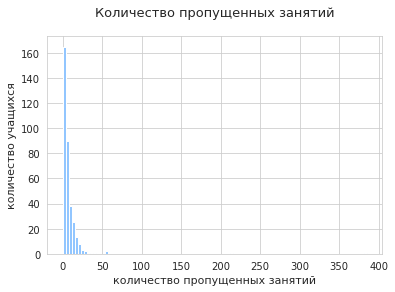

In [251]:
stud_math['absences'].hist(bins=100)
plt.xlabel('количество пропущенных занятий', fontsize=11)
plt.ylabel('количество учащихся', fontsize=11)
plt.title('Количество пропущенных занятий', fontsize=13, pad=20)

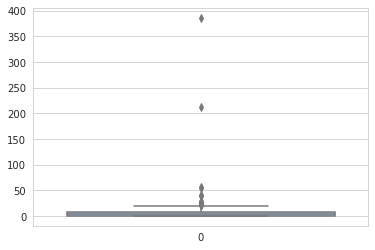

In [252]:
# Посмотрим box plot на наличие выбросов
sns.boxplot(data=stud_math.absences)

Есть значительные выбросы. Посмотрим в процентах

In [253]:
# Посмотрим эти значения в процентах
print(round(stud_math['absences'].value_counts(normalize=True) * 100, 2).sort_values())

385.0     0.29
17.0      0.29
11.0      0.29
23.0      0.29
40.0      0.29
38.0      0.29
19.0      0.29
25.0      0.29
54.0      0.29
21.0      0.29
26.0      0.29
56.0      0.29
24.0      0.29
28.0      0.29
212.0     0.29
30.0      0.29
13.0      0.29
1.0       0.57
15.0      0.57
9.0       0.57
22.0      0.86
20.0      0.86
18.0      1.14
5.0       1.43
7.0       1.71
16.0      2.00
3.0       2.00
14.0      2.86
12.0      3.43
10.0      4.29
8.0       5.71
6.0       8.00
4.0      14.57
2.0      16.29
0.0      28.29
Name: absences, dtype: float64


На мой взгляд, есть очень странные выбросы по количеству пропущенных занятий. Возможно, ученики могли болеть, но действительно ли возможно пропустить больше половины года обучения?  

Давайте посмотрим, действительно ли есть зависимость между пропусками  и баллом по математике

Text(0.5, 1.0, 'Зависимость балла по математике от количества пропущенных занятий')

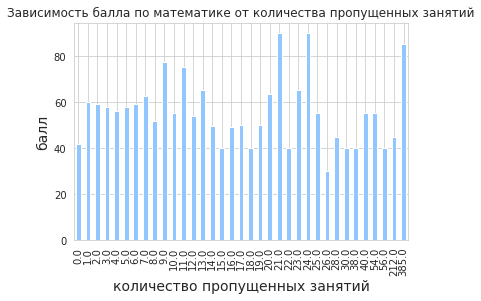

In [254]:
stud_math.groupby('absences')['score'].mean().plot(kind='bar')
plt.xlabel('количество пропущенных занятий', fontsize=14)
plt.ylabel('балл', fontsize=14)
plt.title('Зависимость балла по математике от количества пропущенных занятий')

Как мы видим, четкой зависимости полученной отметки от количества пропущенных занятий не наблюдается. Давайте тогда посмотрим, может, этот показатель будет связан со здоровьем, семейными отношениями, свободным временем и временем, проведенным с друзьями. Посмтрим сводную таблицу.

In [255]:
absences = pd.cut(stud_math['absences'], [0, 2,4,6,8, 12, 20, 50,100])
stud_math.pivot_table(['health', 'famrel', 'goout', 'freetime'], absences, aggfunc=['count','mean'])

count                            mean                              
          famrel freetime goout health    famrel  freetime     goout    health
absences                                                                      
(0, 2]        59       59    57     56  3.898305  3.152542  2.877193  3.625000
(2, 4]        58       58    55     56  3.931034  3.172414  3.363636  3.267857
(4, 6]        33       33    33     31  3.787879  3.181818  3.484848  3.419355
(6, 8]        26       25    26     25  4.038462  3.200000  2.884615  3.520000
(8, 12]       30       30    30     28  3.933333  3.400000  2.933333  3.392857
(12, 20]      29       27    28     29  3.793103  3.666667  3.428571  3.586207
(20, 50]      12       11    12     12  3.750000  2.454545  3.333333  3.000000
(50, 100]      2        1     2      2  4.500000  3.000000  3.000000  3.000000

Явной зависимости нет, при этом на графике выше прослеживается некоторое снижение балла с увеличением пропусков. Этот показатель оставим.

## Баллы по госэкзамену по математике: 'score'

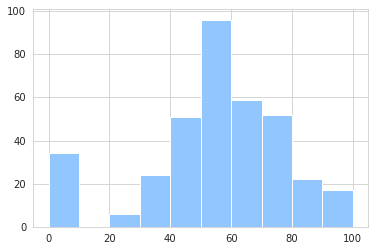

In [258]:
stud_math.score.hist()

Судя по гистограмме, у нас могут быть выбросы. Проверим:

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


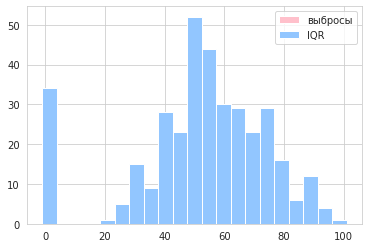

In [259]:
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.score.loc[stud_math.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'pink',
                                  label = 'выбросы')

stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        label = 'IQR')

plt.legend()

In [260]:
stud_math.score.describe()

count    361.000000
mean      52.368421
std       22.846103
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

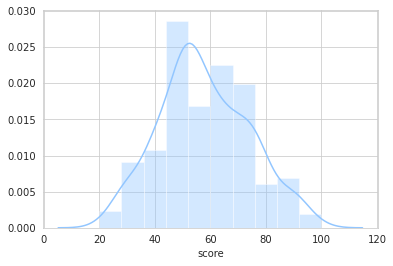

In [261]:
# Давайте посмотрим на распределение без нуля
score_without_0 = stud_math.score.apply(lambda x: x if x>0 else np.nan)
sns.distplot(score_without_0, bins = 10)

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


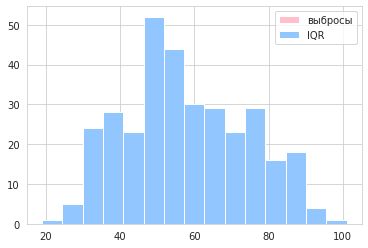

In [262]:
median = score_without_0.median()
IQR = score_without_0.quantile(0.75) - score_without_0.quantile(0.25)
perc25 = score_without_0.quantile(0.25)
perc75 = score_without_0.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


score_without_0.loc[score_without_0 <= 101].hist(bins = 15, 
                                  range = (19, 101), 
                                  color = 'pink',
                                  label = 'выбросы')

score_without_0.loc[score_without_0.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15, 
                                                                        range = (19, 101),
                                                                        label = 'IQR')

plt.legend()

Если посмотреть на границы выбросов, то у нас нет 0, и нет выхода выше 100 (скорее всего максимальный балл был 100).

In [263]:
print(stud_math.shape)

(361, 30)


In [264]:
# Избавимся от выбросов
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5 * IQR,
                                                  perc75 + 1.5 * IQR)]

Посмотрим на итоговый вариант

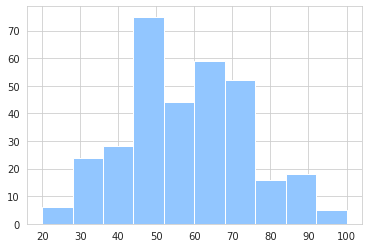

In [265]:
stud_math.score.hist()

# Пройдемся по столбцам с категориальными значениями

Посмотрим значения (подсчитаем уникальные значения) сразу для всех категориальных столбцов:

In [266]:
for col in stud_math.columns:
    if stud_math[col].dtype == 'object':
        print('\nНазвание столбца:',
            col,
        )
        print(stud_math[col].value_counts())


Название столбца: school
GP    290
MS     37
Name: school, dtype: int64

Название столбца: sex
F    170
M    157
Name: sex, dtype: int64

Название столбца: address
U    260
R     67
Name: address, dtype: int64

Название столбца: famsize
GT3    232
LE3     95
Name: famsize, dtype: int64

Название столбца: parents_status
T    297
A     30
Name: parents_status, dtype: int64

Название столбца: mum_job
other       124
services     81
at_home      47
teacher      47
health       28
Name: mum_job, dtype: int64

Название столбца: father_job
other       192
services     82
teacher      26
at_home      14
health       13
Name: father_job, dtype: int64

Название столбца: reason
course        120
reputation     91
home           83
other          33
Name: reason, dtype: int64

Название столбца: guardian
mother    237
father     71
other      19
Name: guardian, dtype: int64

Название столбца: schoolsup
no     282
yes     45
Name: schoolsup, dtype: int64

Название столбца: famsup
yes    212
no     

__Какие данные мы имеем:__  
- есть только две школы, записей для учеников школы GP намного больше, чем учеников школы MS;
- распределение учеников примерно одинаковое (170 девочек и 157 мальчиков);
- учеников, проживающих в городе гораздо больше (260), чем за городом(67) - возможно,это связано со школой, в которую дети ходят;
- учеников многодетных семей больше (232 и 95);
- родители, в основном, живут вместе (297 и 30);
- в сведениях о работе матери большинство значений имеют вариант "другое".
- в сведениях о работе отца большинство значений имеют вариант "другое".
- преобладающее большинство выбирало школу по образовательной программе (120). На втром месте - репутация школы (91)
- преобладающее большинтво детей сопровождают матери (237), отцы только 71, есть дети, кто в качестве опекунов имеют отметку "другое".
- дополнительная образовательная поддержка: имеют 282, не имеют 45
- семейная образовательная поддержка: у многих детей она имеется (212), но также у значительного количества детей ее нет (115).
- меньше половины (137 человек) имеют дополнителные платные занятия по математике, а 190 детей дополнительно платно не занимаются.
- дополнительные внеучебные занятия: у большей половины есть (170 против 157).
- преобладающее большинство посещало детский сад (266 против 61).
- практически все хотят получить высшее образование (315), только 12 человек не планируют его получать.
- преобладающее большинство имеет дома интернет (281 против 46).
- преобладающее большинство состоит в романтических отнршениях (232 против 95).


_Эту информацию будем принимать во внимание._

# Корреляционный анализ

Для того, чтобы найти и отобрать данные, которые имеют наибольшую (положительную или отрицательную) корреляцию со столбцом 'score', проведем корреляционный анализ. 

In [267]:
# Посмотрим корреляцию 
stud_math.corr()['score'].sort_values()

failures     -0.272641
goout        -0.163253
age          -0.116884
traveltime   -0.078749
health       -0.067138
freetime     -0.017335
absences      0.002373
famrel        0.030041
father_edu    0.136274
studytime     0.142675
mum_edu       0.171035
score         1.000000
Name: score, dtype: float64

Мы видим положительную и отрицательную корреляцию. При положительном результате это означает, что с возрастанием одного показателя, балл 'score' также возрастает. И наоборот, при отрицательной корреляции чем выше один показатель, тем ниже итоговый балл госэкзамена по математике.

### Положительная корреляция

- Положительная корреляция параметра 'mum_edu' и 'father_edu' указывает на то, что с увеличением этих показателя (чем лучше образование) балл по госэкзамену увеличивается. При этом от уровня образования матери итоговый балл зависит сильнее, чем от образования отца.

- Положительная корреляция параметра 'studytime' и 'score' может говорить о том, что при увеличении затрачиваемого времени на учёбу помимо школы показатель в столбце 'score' (итоговый балл) имеет возврастающих характер. То же касается и уровня семейных отношений: чем они лучше, тем выше экзаменационный балл.

### Отрицательная корреляция

- Отрицательная корреляция параметра 'failures' говорит о том, что чем больше внеучебных неудач, тем балл по госэкзамену ниже.

- Отрицательная корреляция параметра 'goout' показывает, что чем больше ученик проводит времени с друзьями, тем его балл может быть ниже.

- Отрицательная корреляция параметра 'age' cо 'score' указывает на возможность того, что чем старше ученик, тем его балл вероятно будет ниже.

- Отрицательная корреляция параметра 'traveltime' cо 'score' показывает на то, что чем больше времени у ученика уходит на дорогу до школы, чем балл может быть ниже.

- Отрицательная корреляция параметра 'health' может подтверждать предположение: чем больше ребенок болеет, тем ниже его успеваемость.

- Отрицательная корреляция параметра 'freetime' cо 'score' показывает вероятную обратную зависимость между свободным временем после школы и баллом: чем больше у учащегося свободного времени, тем экзаменационный балл может быть ниже.

### Посмотрим итоговый балл по разным признакам

#### Сравним средний балл по мальчикам (M) и девочкам (F) и сразу по обеим школам

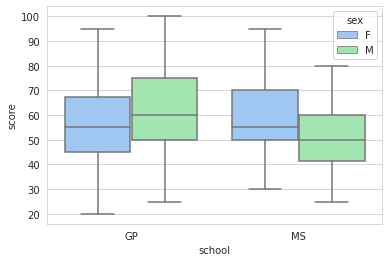

In [268]:
sns.boxplot(x='school', y='score', data=stud_math, hue='sex')

Мы видим, что средний балл по госэкзамену по математике в школе GP выше, но незначительно. В школе GP средний балл выше у мальчиков, при этом в школе MS средний балл выше имеют девочки. Обратим внимание, что средний балл у девочек в разных школах он примерно одинаковый, а у мальчиков в школе GP он выше, а в школе MS ниже. 

### Номинативные переменные

С помощью box plot посмотрим, различаются ли распределения балла в зависимости от значения некоторых номинативных переменных.

Рассмотрим: 'famsize', 'parents_status', 'reason', 'gardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'mum_job', 'father_job', 'romantic'. 

In [269]:
# функция для построения box plot
def stud_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 2))
    sns.boxplot(x=column,
                y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

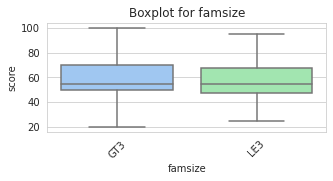

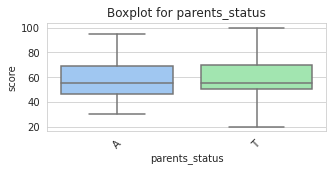

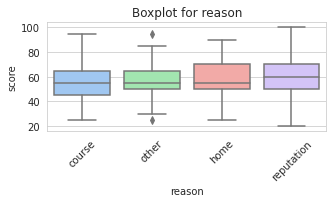

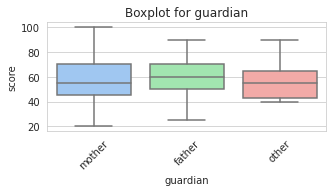

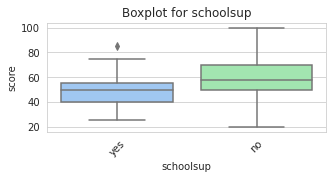

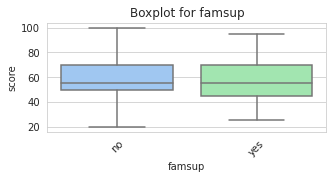

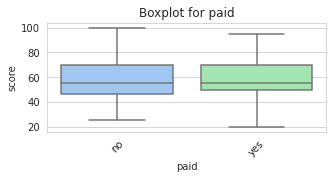

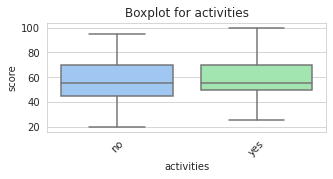

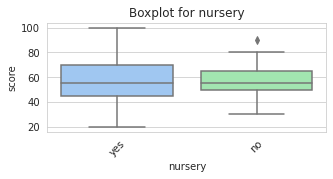

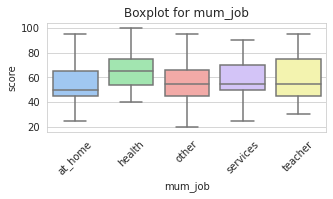

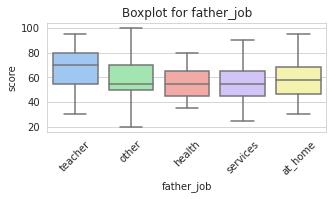

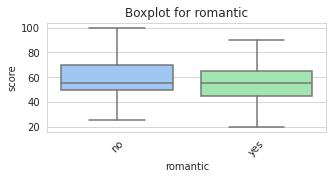

In [270]:
for col in [
        'famsize', 'parents_status', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
        'activities', 'nursery', 'mum_job', 'father_job', 'romantic'
]:
    stud_boxplot(col)

По графикам видим, что оказывать влияние на итоговый балл могут такие параметры, как 'schoolsup', 'mum_job', 'father_job'.

_Для остальных параметров построим графики плотности. Рассмотрим место проживания, хотят ли дети получать высшее образование, есть ли дома интернет._

#### Распределение баллов в зависимости от места проживания

Text(0.5, 1.0, 'График плотности по месту проживания')

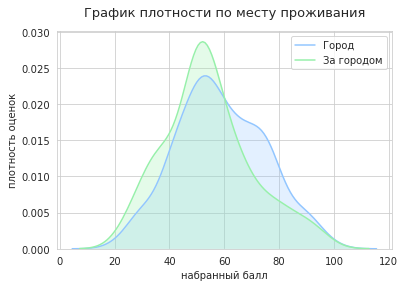

In [271]:
sns.kdeplot(stud_math.loc[stud_math['address'] == 'U', 'score'],
            label='Город',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['address'] == 'R', 'score'],
            label='За городом',
            shade=True)

plt.xlabel('набранный балл')
plt.ylabel('плотность оценок')
plt.title('График плотности по месту проживания',
          fontsize=13,
          pad=15)

``` Вывод: ```  
_Параметр 'address' оставляем - он может влиять на итоговый балл на экзамене_

#### Распределение баллов в зависимости от желания получить высшее образование

Text(0.5, 1.0, 'График плотности по желанию получить высшее образование')

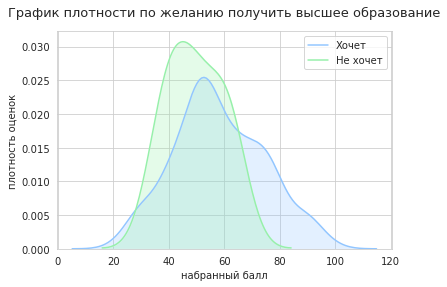

In [272]:
sns.kdeplot(stud_math.loc[stud_math['higher'] == 'yes', 'score'],
            label='Хочет',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['higher'] == 'no', 'score'],
            label='Не хочет',
            shade=True)

plt.xlabel('набранный балл')
plt.ylabel('плотность оценок')
plt.title('График плотности по желанию получить высшее образование',
    fontsize=13,
    pad=15)

``` Вывод: ```  
_Параметр 'higher' оставляем - он может влиять на итоговый балл на экзамене_

#### Распределение баллов в зависимости от наличия интернета дома

Text(0.5, 1.0, 'График плотности по наличию интернета')

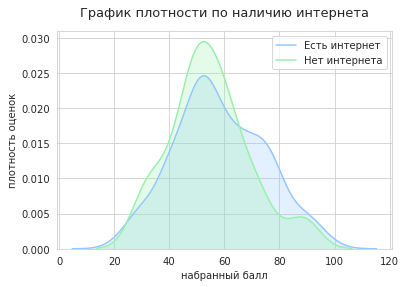

In [273]:
sns.kdeplot(stud_math.loc[stud_math['internet'] == 'yes', 'score'],
            label='Есть интернет',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['internet'] == 'no', 'score'],
            label='Нет интернета',
            shade=True)

# Добавление надписей
plt.xlabel('набранный балл')
plt.ylabel('плотность оценок')
plt.title('График плотности по наличию интернета',
          fontsize=13,
          pad=15)

``` Вывод: ```  
_Параметр 'higher' оставляем - он может влиять на итоговый балл на экзамене_

## Тест Стьюдента

Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам неразличимы

In [274]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # учет поправки Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [275]:
for col in ['famsize', 'parents_status',
            'mum_job', 'father_job', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery',
            'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, серьезно отличаются 2 параметра: 'father_job' и 'schoolsup' (дополнительная образовательная поддержка). Оставим также и эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на итоговую оценку ('score'), это: **age, absences, address, mum_edu, father_edu, mum_job, father_job, studytime, paid, goout, schoolsup, higher, internet, failures.**

In [277]:
# создадим новый датафрейм для построения будущей модели
stud_math_for_model = stud_math.loc[:, [
    'score', 'absences', 'address', 'age', 'failures', 'father_edu', 'father_job', 'goout',  'higher', 'internet',
    'mum_edu',  'mum_job', 'paid', 'schoolsup', 'studytime' 
    
]]
stud_math_for_model.head()

,score,absences,address,age,failures,father_edu,father_job,goout,higher,internet,mum_edu,mum_job,paid,schoolsup,studytime
0,30.0,6.0,U,18,0.0,4.0,teacher,4.0,yes,yes,4.0,at_home,no,yes,2.0
1,30.0,4.0,U,17,0.0,1.0,other,3.0,yes,yes,1.0,at_home,no,no,2.0
2,50.0,10.0,U,15,3.0,1.0,other,2.0,yes,yes,1.0,at_home,no,yes,2.0
3,75.0,2.0,U,15,0.0,2.0,other,2.0,yes,yes,4.0,health,yes,no,3.0
4,50.0,4.0,U,16,0.0,3.0,other,2.0,yes,no,3.0,other,yes,no,2.0


# Выводы

В результате EDA для анализа влияния различных параметров на балл по госэкзамену по математике были получены следующие выводы:

- В данных есть пустые значения, в некоторых случаях они составляли около 12% от всех значений рассматриваемого параметра. При этом нулевые значения полностью отсутствут только у колонок, в которых содержится информация о школе ученика, его половой принадлежности и возрасте.
- Выбросы найдены в столбцах, в которых хранятся сведения об образовании отца, отношениях в семье, пропущенных занятиях. В столбце, где хранятся данные о балле по госэкзамену были отмечены подозрительные значения.
- Параметр 'father_job' имеет существенно много значений 'другое'.
- Положительная корреляция параметра 'mum_edu' и 'father_edu' указывает на то, что с увеличением этих показателя (чем лучше образование) балл по госэкзамену увеличивается. При этом от уровня образования матери итоговый балл зависит сильнее, чем от образования отца.
- Положительная корреляция параметра 'studytime' и 'score' может говорить о том, что при увеличении затрачиваемого времени на учёбу помимо школы показатель в столбце 'score' (итоговый балл) имеет возврастающих характер. То же касается и уровня семейных отношений: чем они лучше, тем выше экзаменационный балл.
- Отрицательная корреляция параметра 'failures' говорит о том, что чем больше внеучебных неудач, тем балл по госэкзамену ниже.
- Отрицательная корреляция параметра 'goout' показывает, что чем больше ученик проводит времени с друзьями, тем его балл может быть ниже.
- Отрицательная корреляция параметра 'age' cо 'score' указывает на возможность того, что чем старше ученик, тем его балл вероятно будет ниже.
- Отрицательная корреляция параметра 'traveltime' cо 'score' показывает на то, что чем больше времени у ученика уходит на дорогу до школы, чем балл может быть ниже.
- Отрицательная корреляция параметра 'health' может подтверждать предположение: чем больше ребенок болеет, тем ниже его успеваемость.
- Отрицательная корреляция параметра 'freetime' cо 'score' показывает вероятную обратную зависимость между свободным временем после школы и баллом: чем больше у учащегося свободного времени, тем экзаменационный балл может быть ниже.

Самые важные параметры, которые предполагается использовать в дальнейшем для построения модели, это  **age, absences, address, mum_edu, father_edu, mum_job, father_job, studytime, paid, goout, schoolsup, higher, internet, failures.**

Результат работы включает подготовленный датасет **stud_math_for_model**.